<a href="https://colab.research.google.com/github/alifele/Neuro_Science/blob/master/Neuro_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import io, requests
import pandas as pd

#Importing Data


In [3]:
url= 'https://github.com/alifele/Neuro_Science/raw/master/IF_data.npz'
s = requests.get(url, stream = True).content
data_X = np.load(io.BytesIO(s))
print(data_X.files)

['arr_0', 'arr_1']


In [15]:
X = data_X ['arr_0']
Y = data_X ['arr_1'].T
print('the shape of X is : {}'.format(X.shape))
print('the shape of Y is : {}'.format(Y.shape))


the shape of X is : (160, 1000)
the shape of Y is : (160, 5)


#Implementing tha PCA methods on X
First of all I want to plot the Scree plot of the PCA features

<BarContainer object of 160 artists>

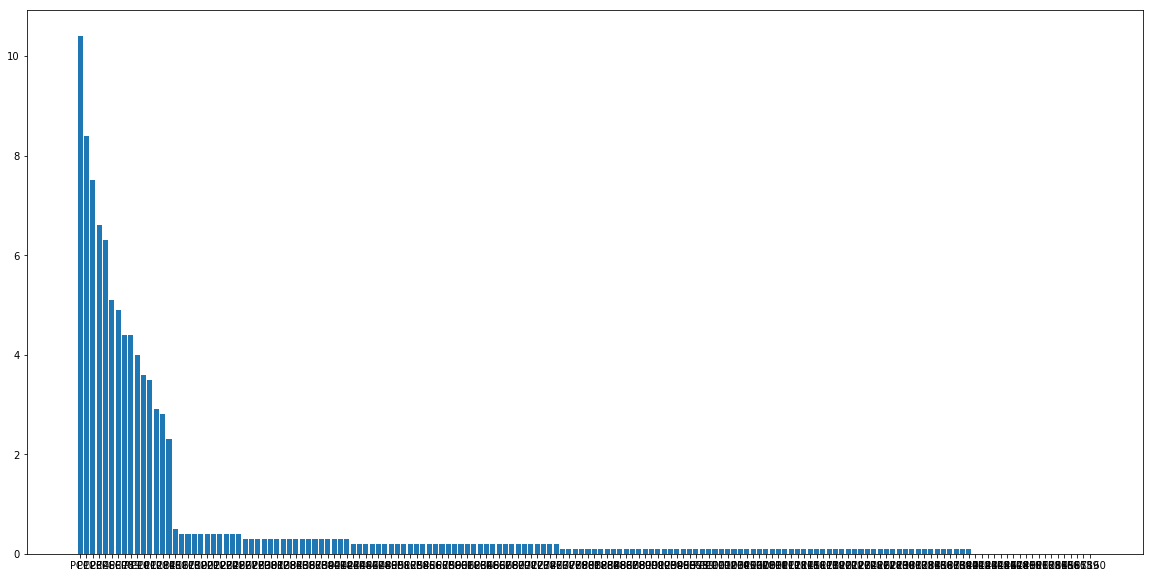

In [21]:
from sklearn.decomposition import PCA
n = 160
pca = PCA(n)
pca.fit(X)
pca_data = pca.transform(X)
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ["PC" + str(i) for i in range (1,len(per_var)+1)]
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111)
ax.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)

from the above scree plot we can see that the importance of the pca features decrease significantly afte the about first 16 features.

so it is rational to keep the first 16 pca_features

In [23]:
n_pca = 16
pca = PCA(n_pca)
pca.fit(X)
pca_features = pca.transform(X)
print('the shape of pca_featuers is : {}'.format(pca_features.shape))

the shape of pca_featuers is : (160, 16)
